<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek3/Decisions_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus
from IPython.display import Image

# Memuat dataset Iris
iris = datasets.load_iris()

# Dataset Iris sekarang tersimpan dalam objek 'iris'
# Anda dapat mengakses fitur dan labelnya seperti ini:
X = iris.data  # Fitur-fitur (atribut)
y = iris.target  # Label (jenis bunga)

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [37]:
unique_target = iris_df['target'].unique()
print("Nilai unique ")
print(unique_target)


Nilai unique 
[0 1 2]


In [38]:
atribut_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris_df[atribut_columns]

# Mendefinisikan kolom target
y = iris_df['target']

print("Kolom Atribut:")
print(X.head())
print("\nKolom Target:")
print(y.head())

Kolom Atribut:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Kolom Target:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [39]:
# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Membuat model Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Melatih model pada data pelatihan
tree.fit(X_train, y_train)

# Memprediksi data uji
y_pred = tree.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy * 100:.2f}%')

Akurasi model Decision Tree: 90.67%


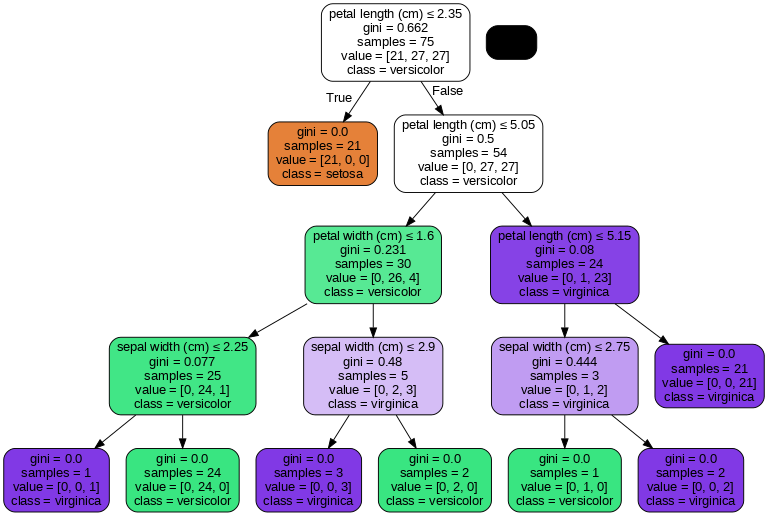

In [47]:
# Membuat grafik Decision Tree
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=atribut_columns,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')  # Ukuran grafik
Image(graph.create_png())  # Menampilkan grafik dalam format PNG